# Importing libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
print('setup com')

setup com


In [93]:
cars_data=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
cars_data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


# Data manipulation
### Let's create a variable indicates the percentage of increase b/n present and selling prices

In [94]:
cars_data['Ration p/s price (%)']=round(((cars_data['Present_Price']-cars_data['Selling_Price'])/(cars_data['Selling_Price'])*100),1)
cars_data.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
21,ignis,2017,4.90,5.71,2400,Petrol,Dealer,Manual,0,16.5
20,alto k10,2016,2.85,3.95,25000,Petrol,Dealer,Manual,0,38.6
268,brio,2017,4.80,5.80,19000,Petrol,Dealer,Manual,0,20.8


In [95]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_Name              301 non-null    object 
 1   Year                  301 non-null    int64  
 2   Selling_Price         301 non-null    float64
 3   Present_Price         301 non-null    float64
 4   Kms_Driven            301 non-null    int64  
 5   Fuel_Type             301 non-null    object 
 6   Seller_Type           301 non-null    object 
 7   Transmission          301 non-null    object 
 8   Owner                 301 non-null    int64  
 9   Ration p/s price (%)  301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


# Uni-variate analysis

### 1. Catogrical variables

In [96]:
cars_data.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

### The most cars sold that produced in 2015>2016>2014>2017>2013

In [97]:
cars_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

### The most cars sold that has a fuel type Petrol > Diesel > CNG

In [98]:
cars_data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

### The most cars sold that has a seller type Dealer > Individual

In [99]:
cars_data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

### The most cars sold that has a Transmission type Manula > Automatic

In [100]:
cars_data.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

### 2. Numerical variables

In [101]:
cars_data[['Selling_Price','Present_Price','Kms_Driven']].describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


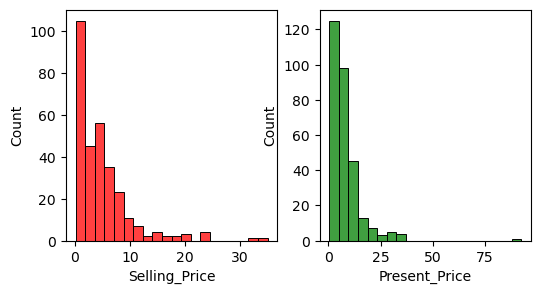

In [102]:
plt.rcParams['figure.figsize'] = (6, 3)
fig, axes = plt.subplots(1,2)
sns.histplot(cars_data, x='Selling_Price', color="r",bins=20,ax=axes[0])
sns.histplot(cars_data, x="Present_Price", color="green",bins=20, ax=axes[1])
plt.show()

In [103]:
cars_data.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
21,ignis,2017,4.90,5.71,2400,Petrol,Dealer,Manual,0,16.5
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,6.3


# Data analysis Questions ( Bi-variate analysis )
## 1. What'the relation b/n the selling price with other features?


In [104]:
corr=cars_data.corr()['Selling_Price'].to_frame()
corr

,Selling_Price
Year,0.236141
Selling_Price,1.000000
Present_Price,0.878983
Kms_Driven,0.029187
Owner,-0.088344
Ration p/s price (%),-0.190878


<AxesSubplot:>

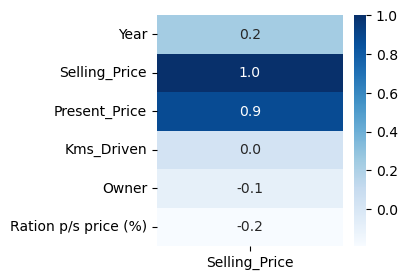

In [105]:
plt.figure(figsize=(3,3))
sns.heatmap(corr,annot=True,fmt='.1f',cmap='Blues')

## 1.1 according to **Year**

In [106]:
cars_data.groupby('Year').agg({'Selling_Price': ['mean','median','max']})

Selling_Price              
              mean median    max
Year                            
2003      1.300000  1.300   2.25
2004      1.500000  1.500   1.50
2005      2.487500  3.120   3.51
2006      1.437500  1.575   2.50
2007      0.160000  0.160   0.20
2008      1.002857  0.250   4.00
2009      2.816667  3.175   3.80
2010      5.262667  2.650  35.00
2011      2.375263  2.700   4.50
2012      3.841304  3.100  14.90
2013      3.540909  3.500  16.00
2014      4.762105  4.450  19.99
2015      5.927049  5.250  23.50
2016      5.213200  5.250  20.75
2017      6.209143  3.500  33.00
2018      9.250000  9.250   9.25

In [107]:
cars_data[cars_data['Selling_Price']==cars_data['Selling_Price'].max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,164.6


In [108]:
cars_data[cars_data['Selling_Price']==cars_data['Selling_Price'].min()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
200,Bajaj Pulsar 150,2006,0.1,0.75,92233,Petrol,Individual,Manual,0,650.0


## 1.2 according to **Present Price**


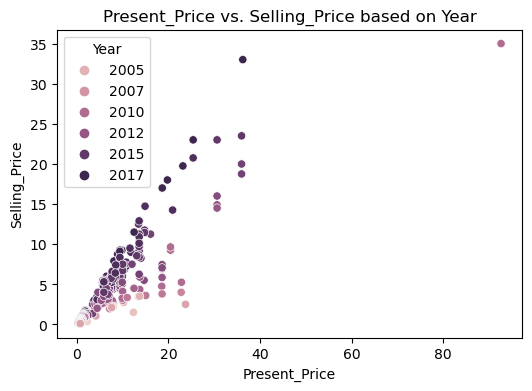

In [109]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Present_Price',y='Selling_Price',hue='Year',data=cars_data)
ax.set_title('Present_Price vs. Selling_Price based on Year')
plt.show()

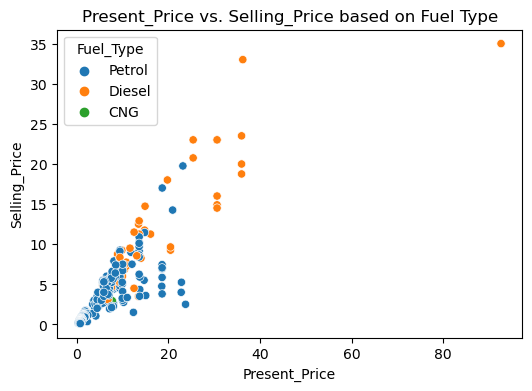

In [110]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Present_Price',y='Selling_Price',hue='Fuel_Type',data=cars_data)
ax.set_title('Present_Price vs. Selling_Price based on Fuel Type')
plt.show()

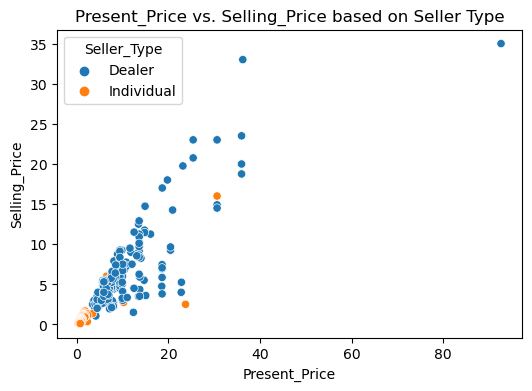

In [111]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Present_Price',y='Selling_Price',hue='Seller_Type',data=cars_data)
ax.set_title('Present_Price vs. Selling_Price based on Seller Type')
plt.show()

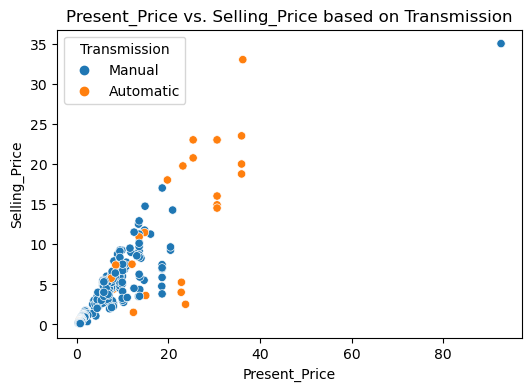

In [112]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Present_Price',y='Selling_Price',hue='Transmission',data=cars_data)
ax.set_title('Present_Price vs. Selling_Price based on Transmission')
plt.show()

## 1.3 according to **kms Driven**

In [113]:
cars_data.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
273,jazz,2010,2.25,7.500,61203,Petrol,Dealer,Manual,0,233.3
150,TVS Apache RTR 180,2011,0.50,0.826,6000,Petrol,Individual,Manual,0,65.2


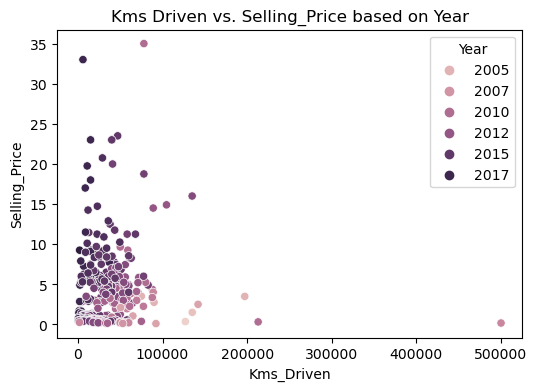

In [114]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Kms_Driven',y='Selling_Price',hue='Year',data=cars_data)
ax.set_title('Kms Driven vs. Selling_Price based on Year')
plt.show()

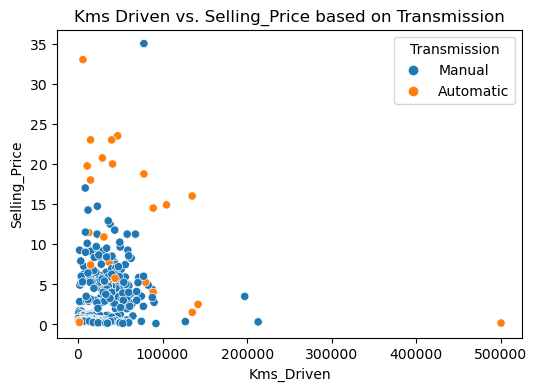

In [115]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Kms_Driven',y='Selling_Price',hue='Transmission',data=cars_data)
ax.set_title('Kms Driven vs. Selling_Price based on Transmission')
plt.show()

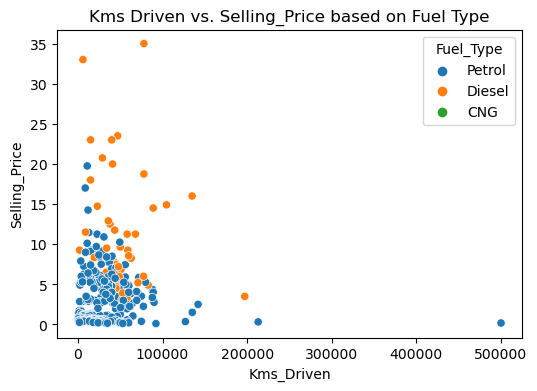

In [116]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Kms_Driven',y='Selling_Price',hue='Fuel_Type',data=cars_data)
ax.set_title('Kms Driven vs. Selling_Price based on Fuel Type')
plt.show()

## 1.4 according to **Fuel Type**

In [117]:
cars_data.groupby('Fuel_Type').agg({'Selling_Price': ['mean','median','max','min']})

Selling_Price                    
                   mean median    max   min
Fuel_Type                                  
CNG            3.100000   3.10   3.25  2.95
Diesel        10.278500   7.75  35.00  3.10
Petrol         3.264184   2.65  19.75  0.10

## 1.5 according to **Seller Type**

In [118]:
cars_data.groupby('Seller_Type').agg({'Selling_Price': ['mean','median','max','min']})

Selling_Price                   
                     mean median   max   min
Seller_Type                                 
Dealer           6.721692  5.250  35.0  1.05
Individual       0.870943  0.515  16.0  0.10

## 1.6 according to **Transmission**

In [119]:
cars_data.groupby('Transmission').agg({'Selling_Price': ['mean','median','max','min']})

Selling_Price                   
                      mean median   max   min
Transmission                                 
Automatic         9.420000   5.80  33.0  0.17
Manual            3.931992   3.25  35.0  0.10

## 1.7 according to **Fuel Type & Transmission**

In [120]:
cars_data.groupby(['Fuel_Type','Transmission']).agg({'Selling_Price': ['mean','median','max','min']})

Selling_Price                      
                                mean  median    max    min
Fuel_Type Transmission                                    
CNG       Manual            3.100000   3.100   3.25   2.95
Diesel    Automatic        20.699167  20.370  33.00  14.50
          Manual            7.673333   6.675  35.00   3.10
Petrol    Automatic         4.586071   4.450  19.75   0.17
          Manual            3.088768   2.550  17.00   0.10

## 1.8 according to **The ration of p/s prices**

In [121]:
cars_data.sample(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
227,i10,2011,2.55,4.43,57000,Petrol,Dealer,Manual,0,73.7


## Which the car with the highest Ratio of p/s price (%) ?

In [122]:
cars_data[cars_data['Ration p/s price (%)']==cars_data['Ration p/s price (%)'].max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3,849.2


# Data Modeling
## Let's first prepare our data for modeling 

### 1. Categorical variables encoding

In [123]:
# encoding "Fuel_Type" Column
cars_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
cars_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
cars_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
cars_data.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Ration p/s price (%)
29,ciaz,2015,7.45,10.38,45000,1,0,0,0,39.3
219,verna,2012,4.50,9.40,36000,0,0,0,0,108.9
24,wagon r,2013,2.90,4.41,56879,0,0,0,0,52.1


### 2. Splitting the data and Target

In [124]:
x=cars_data.drop(['Car_Name','Selling_Price'],axis=1)
y=cars_data['Selling_Price']

### 3. Splitting Training and Test data

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


### 4. Building some models and fitting on the data

### 4.1 Building the first model and fitting on the data

In [126]:
RL=LinearRegression()
RL.fit(x_train,y_train)

LinearRegression()

## 4.1.1 Model prediction & evaluation on traing data

In [127]:
training_data_prediction=RL.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8923730909173184


## 4.1.2 Model prediction & evaluation on test data

In [128]:
test_data_prediction=RL.predict(x_test)

# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8361627938658716


### 4.1.3 Compare the Actual Values and Predicted Values in a Plot

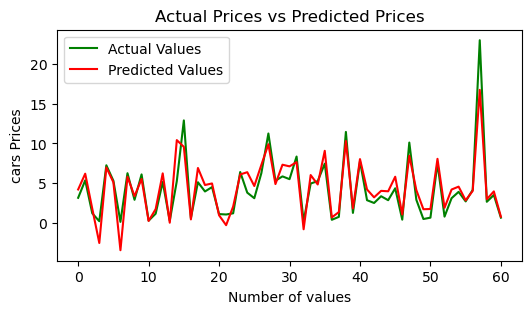

In [129]:
y_test = list(y_test)
plt.plot(y_test, color='green', label = 'Actual Values')
plt.plot(test_data_prediction, color='red', label='Predicted Values')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of values')
plt.ylabel('cars Prices')
plt.legend()
plt.show()

### 4.2 Building the second model and fitting on the data ( with cross validation technique )

In [136]:
# number of features in X_train
len(x_train.columns)

8

In [148]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [149]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 9))}]
RL2 = LinearRegression()
RL2.fit(x_train,y_train)
rfe = RFE(RL2)
           
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)
# fit the model
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8]}],
             return_train_score=True, scoring='r2', verbose=1)

In [150]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008138,0.000974,0.002039,0.000149,1,{'n_features_to_select': 1},0.247974,0.443304,0.318977,0.294032,...,0.315927,0.067791,8,0.325155,0.287696,0.302964,0.311605,0.314000,0.308284,0.012494
1,0.007043,0.000324,0.002176,0.000159,2,{'n_features_to_select': 2},0.151105,0.569445,0.395139,0.485754,...,0.421021,0.145996,7,0.497348,0.399604,0.426303,0.398559,0.398022,0.423967,0.038216
2,0.006164,0.000040,0.001984,0.000049,3,{'n_features_to_select': 3},0.254836,0.592849,0.495689,0.560413,...,0.500111,0.127874,6,0.574636,0.488894,0.503880,0.483878,0.478846,0.506027,0.035312
3,0.005987,0.000886,0.002135,0.000311,4,{'n_features_to_select': 4},0.254551,0.643629,0.515254,0.561643,...,0.528499,0.147563,5,0.576704,0.527306,0.548657,0.483889,0.511181,0.529547,0.031673
4,0.004954,0.000110,0.001967,0.000027,5,{'n_features_to_select': 5},0.659465,0.643604,0.513868,0.602714,...,0.617401,0.056367,4,0.846384,0.527308,0.548823,0.523033,0.511191,0.591348,0.128098
5,0.004145,0.000056,0.001976,0.000057,6,{'n_features_to_select': 6},0.739807,0.903841,0.883168,0.805066,...,0.850128,0.067658,2,0.904010,0.882932,0.883517,0.901616,0.877114,0.889838,0.010855
6,0.003443,0.000068,0.001938,0.000046,7,{'n_features_to_select': 7},0.725318,0.911878,0.869401,0.828812,...,0.852070,0.071825,1,0.911878,0.889103,0.893520,0.903852,0.883469,0.896364,0.010236
7,0.002674,0.000063,0.001916,0.000009,8,{'n_features_to_select': 8},0.725688,0.790039,0.869967,0.827881,...,0.827844,0.068125,3,0.912356,0.892749,0.893726,0.903870,0.883553,0.897251,0.009923


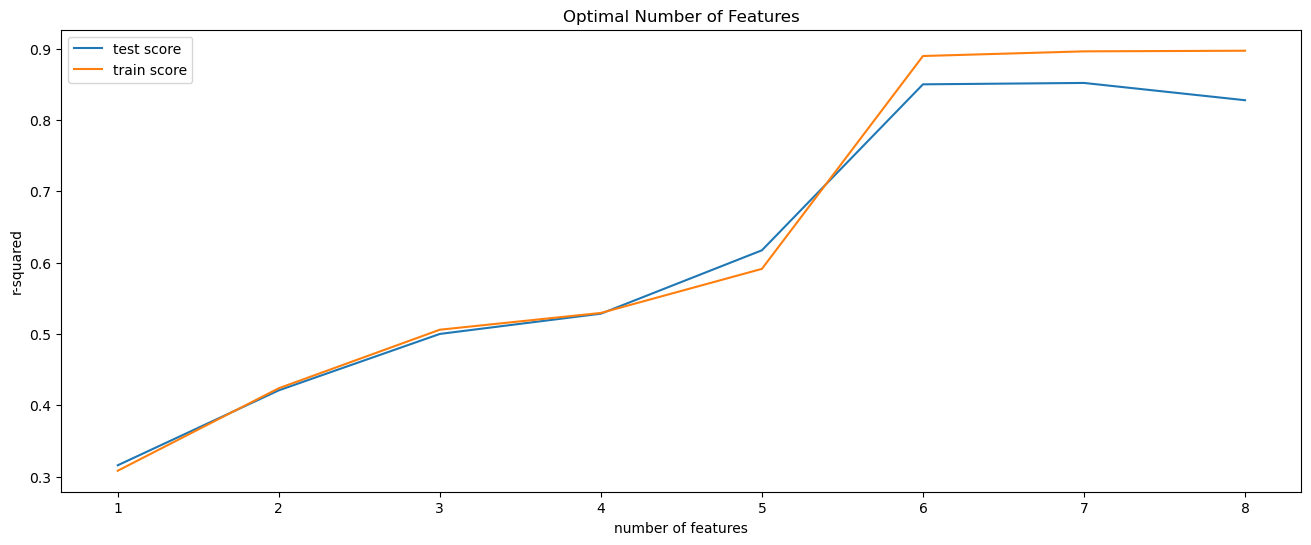

In [151]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [152]:
# final model
n_features_optimal = 9

RL2 = LinearRegression()
RL2.fit(x_train, y_train)

rfe = RFE(RL2, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = RL2.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8361627938658716


# Sounds good 